In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('sample_reviews.csv')

In [ ]:
# Encode the target variable 'label' into numerical format
df['label_encoded'] = df['label'].apply(lambda x: 1 if x == 'CG' else 0)

In [ ]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text.lower()  # Convert to lowercase

In [ ]:
# Clean text_
df["text_"] = df["text_"].astype(str).apply(clean_text)

# Extract features and label_encoded
X = df["text_"]
y = df["label_encoded"]

# Convert text data into bag-of-words features
# vectorizer = CountVectorizer()
# vectorizer = CountVectorizer(ngram_range=(1, 3))  
# vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(ngram_range=(1, 3))  

X = vectorizer.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 1: First split — hold out 10% for test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

# Step 2: Second split — split remaining 90% into 80% train and 10% val
# Since X_temp is 90%, we want to split off 1/9 ≈ 0.1111 to get 10% of the original data
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=1/9, random_state=42, stratify=y_temp
)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a simple classifier
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_val)
acc_lr = accuracy_score(y_val, y_pred)
print(f"Accuracy: {acc_lr:.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.9258

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      2022
           1       0.97      0.88      0.92      2022

    accuracy                           0.93      4044
   macro avg       0.93      0.93      0.93      4044
weighted avg       0.93      0.93      0.93      4044



In [ ]:
from sklearn.svm import LinearSVC

# Train a simple classifier
svm = LinearSVC(random_state=42, C=100)
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm.predict(X_val)
acc_svm = accuracy_score(y_val, y_pred)
print(f"Accuracy: {acc_svm:.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.9535

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      2022
           1       0.97      0.94      0.95      2022

    accuracy                           0.95      4044
   macro avg       0.95      0.95      0.95      4044
weighted avg       0.95      0.95      0.95      4044



c:\Users\dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Train a simple classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = mnb.predict(X_val)
acc_mnb = accuracy_score(y_val, y_pred)
print(f"Accuracy: {acc_mnb:.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.8165

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.65      0.78      2022
           1       0.74      0.99      0.84      2022

    accuracy                           0.82      4044
   macro avg       0.86      0.82      0.81      4044
weighted avg       0.86      0.82      0.81      4044



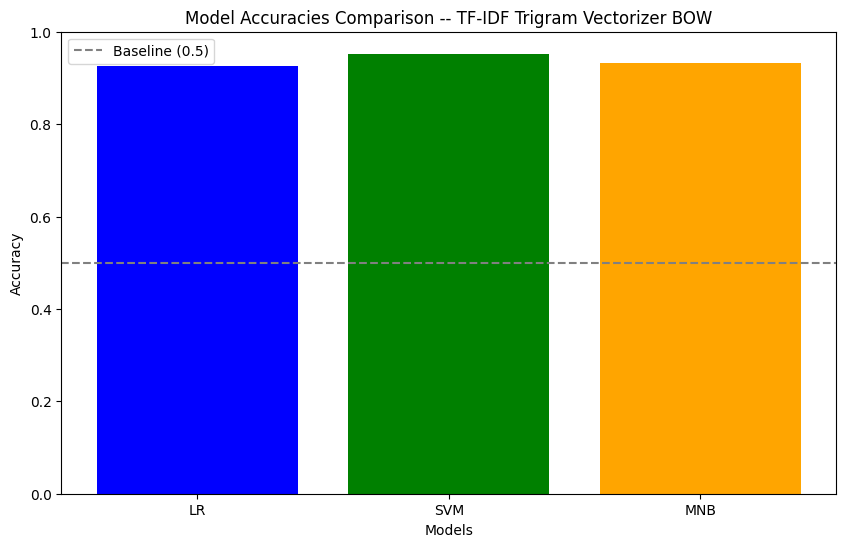

In [ ]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['LR', 'SVM', 'MNB']
accuracies = [acc_lr, acc_svm, acc_mnb]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.axhline(y=0.5, color='gray', linestyle='--', label='Baseline (0.5)')  # Add baseline
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison -- TF-IDF Trigram Vectorizer BOW')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for better visualization
plt.legend()
plt.show()

In [ ]:
feature_names = vectorizer.get_feature_names_out()


In [ ]:
import numpy as np

# Get coefficients from the model
coefficients = lr.coef_[0]

# Zip them with the feature names
feature_weights = list(zip(feature_names, coefficients))

# Sort by weight (importance)
top_positive = sorted(feature_weights, key=lambda x: x[1], reverse=True)[:20]
top_negative = sorted(feature_weights, key=lambda x: x[1])[:20]

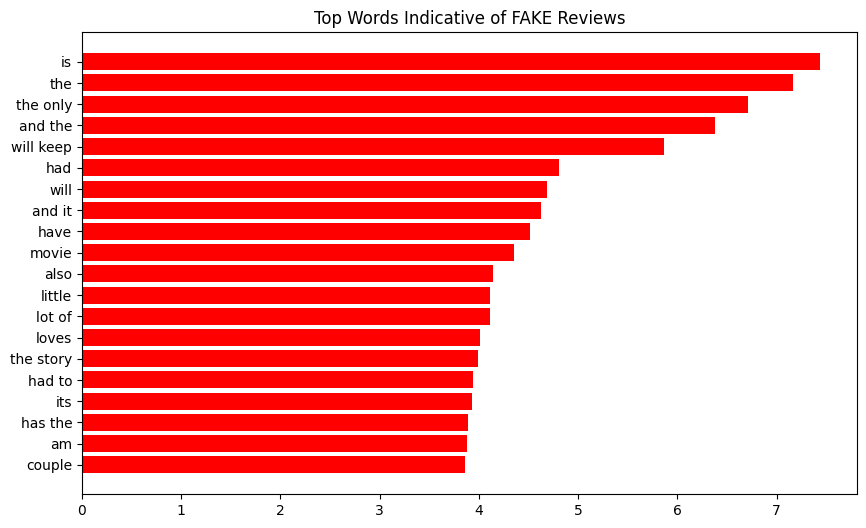

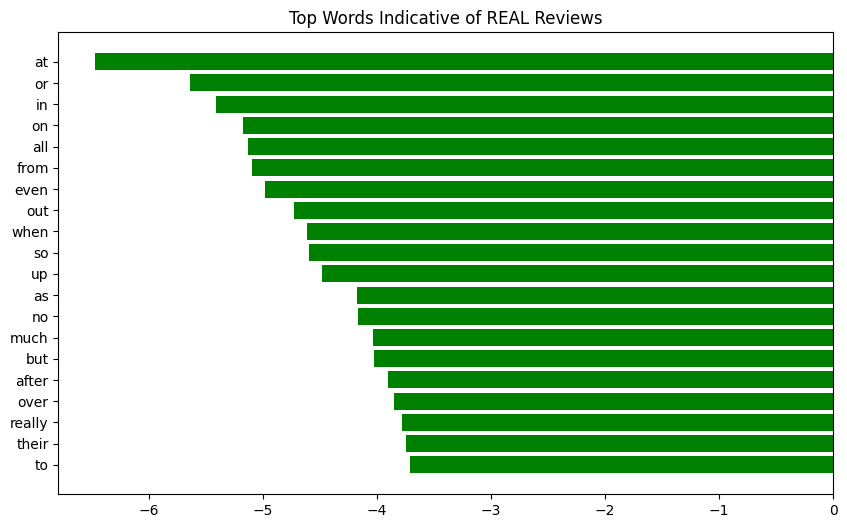

In [ ]:
import matplotlib.pyplot as plt

# Convert to arrays for plotting
words_pos, weights_pos = zip(*top_positive)
words_neg, weights_neg = zip(*top_negative)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(words_pos[::-1], weights_pos[::-1], color='red')
plt.title("Top Words Indicative of FAKE Reviews")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(words_neg[::-1], weights_neg[::-1], color='green')
plt.title("Top Words Indicative of REAL Reviews")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best C:", grid.best_params_['C'])

Best C: 100


In [ ]:
print(grid.best_params_)

{'C': 100}


In [ ]:
y_train_pred = svm.predict(X_train)
y_val_pred = svm.predict(X_val)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Val Accuracy:", accuracy_score(y_val, y_val_pred))

Train Accuracy: 0.9999690823645807
Val Accuracy: 0.9535113748763601


In [ ]:
from sklearn.model_selection import GridSearchCV

Cs = [0.01, 0.1, 1, 10]

param_grid = {'C': Cs}
grid = GridSearchCV(LinearSVC(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best C:", grid.best_params_['C'])

Best C: 10


In [ ]:
import pandas as pd

# Convert the cv_results_ dict into a DataFrame
results_df = pd.DataFrame(grid.cv_results_)

# Select relevant columns
results_df = results_df[["param_alpha", "mean_test_score", "std_test_score"]]

# Sort by accuracy
results_df = results_df.sort_values(by="mean_test_score", ascending=False)

print(results_df)

   param_alpha  mean_test_score  std_test_score
0        0.001         0.913369        0.002733
1        0.010         0.889222        0.003548
2        0.100         0.853172        0.002473
3        1.000         0.807259        0.001032
4       10.000         0.685660        0.000443


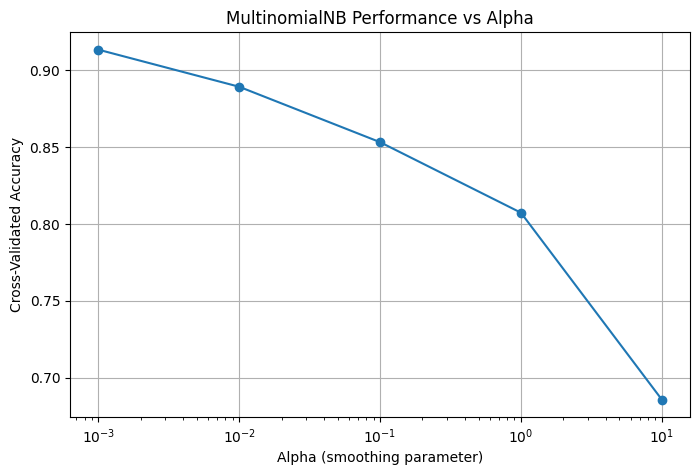

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(results_df["param_alpha"], results_df["mean_test_score"], marker='o')
plt.xscale('log')  # Use log scale for alpha
plt.xlabel("Alpha (smoothing parameter)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("MultinomialNB Performance vs Alpha")
plt.grid(True)
plt.show()

In [ ]:
rest_df = pd.read_csv('restaurant_reviews_anonymized.csv', encoding='latin1')
y = 1 - rest_df['Real']

In [ ]:
# Clean text_
X = rest_df["Review"].astype(str).apply(clean_text)

X = vectorizer.transform(X)

In [ ]:
y_pred = svm.predict(X)

In [ ]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [ ]:
print(accuracy_score(y_pred, y))


0.5


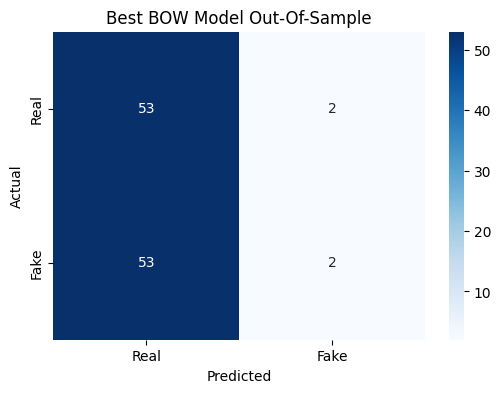

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Best BOW Model Out-Of-Sample")
plt.show()